# Lab 1 : Applied Time series 

---

In [1]:
import polars as pl 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

---
## Exercise 1 


Text(0.5, 1.0, 'White Noise')

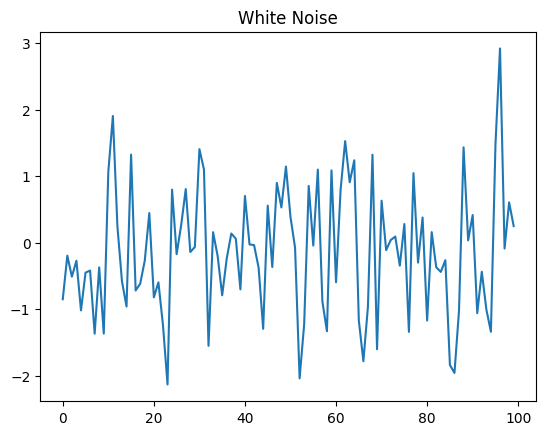

In [21]:
white_noises = np.random.normal(0,1,size=(100, 1000))
sns.lineplot(white_noises[:,0]).set_title("White Noise")

### Autocorrelation plots

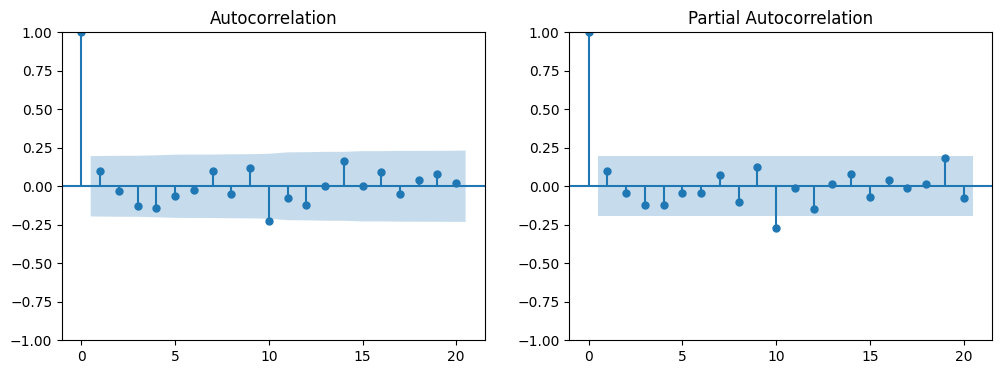

In [22]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

fig = sm.graphics.tsa.plot_acf(white_noises[:,0], ax=ax1)
fig = sm.graphics.tsa.plot_pacf(white_noises[:,0], ax=ax2)

### Ljung Box test

In [79]:
lb_test = sm.tsa.stattools.q_stat(
    sm.tsa.stattools.acf(x = white_noises[:,0], nlags=20)[1:],
    100
)

In [81]:
print(f"""
Q-Stats for the Ljung Box test : 
{
    lb_test[0]
}
P-Values for the Ljung-Box test :
{
    lb_test[1]
}
    """)


Q-Stats for the Ljung Box test : 
[ 1.06556755  1.15810608  2.84019502  5.03006032  5.43074128  5.50848079
  6.54624782  6.85608583  8.50830184 14.39327507 15.0968764  16.79171929
 16.7935289  19.95197534 19.95200121 21.03795817 21.31725647 21.51145235
 22.25295033 22.30275216]
P-Values for the Ljung-Box test :
[0.30194878 0.56042882 0.41692577 0.284227   0.36560013 0.48043228
 0.47759967 0.5522367  0.4838406  0.15579692 0.17810471 0.15760153
 0.20891549 0.13166282 0.17378172 0.17705611 0.21241992 0.25439874
 0.27184878 0.32431103]
    


<Axes: ylabel='Count'>

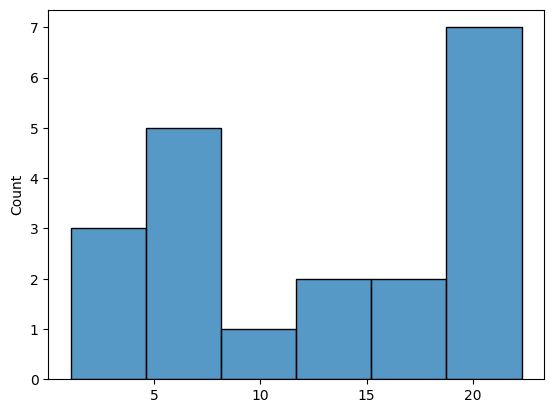

In [90]:
sns.histplot(lb_test[0])

In [89]:
f"Rejection percentage : {np.mean(lb_test[1]<0.05)*100} %"

'Rejection percentage : 0.0 %'